In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

**<h4>Business Problem</h4>**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

In [50]:
df = pd.read_csv('/content/sample_data/aerofit_treadmill.txt') 
df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85


In [51]:
df.shape

(180, 9)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [53]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [54]:
df.describe(include='object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [55]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [56]:
df.isna().sum(axis=0)

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

**<h4>Unique Value Count Each</h4>**

In [57]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [58]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [59]:
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [60]:
df['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [61]:
df['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

**<h4>Probability- marginal, conditional probability. (Using Crossatab)</h4>**

In [62]:
round(pd.crosstab(df['Product'],df['Gender'],margins=True,normalize=True)*100,2)

Gender,Female,Male,All
Product,,,
KP281,22.22,22.22,44.44
KP481,16.11,17.22,33.33
KP781,3.89,18.33,22.22
All,42.22,57.78,100.00


In [63]:
round(pd.crosstab(df['Product'],df['Usage'],margins=True,normalize=True)*100,2)

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,10.56,20.56,12.22,1.11,0.00,0.00,44.44
KP481,7.78,17.22,6.67,1.67,0.00,0.00,33.33
KP781,0.00,0.56,10.00,6.67,3.89,1.11,22.22
All,18.33,38.33,28.89,9.44,3.89,1.11,100.00


In [64]:
round(pd.crosstab(df['Product'], df['Fitness'], margins=True, normalize=True)*100,2)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,0.56,7.78,30.00,5.00,1.11,44.44
KP481,0.56,6.67,21.67,4.44,0.00,33.33
KP781,0.00,0.00,2.22,3.89,16.11,22.22
All,1.11,14.44,53.89,13.33,17.22,100.00


In [65]:
round(pd.crosstab(df['Product'], df['MaritalStatus'], margins=True, normalize=True)*100,2)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,26.67,17.78,44.44
KP481,20.00,13.33,33.33
KP781,12.78,9.44,22.22
All,59.44,40.56,100.00


In [66]:
round(pd.crosstab(df['Fitness'], df['Usage'], margins=True, normalize=True)*100,2)

Usage,2,3,4,5,6,7,All
Fitness,,,,,,,
1,0.56,0.56,0.00,0.00,0.00,0.00,1.11
2,7.78,5.56,1.11,0.00,0.00,0.00,14.44
3,10.00,26.11,16.67,1.11,0.00,0.00,53.89
4,0.00,5.56,3.89,3.33,0.56,0.00,13.33
5,0.00,0.56,7.22,5.00,3.33,1.11,17.22
All,18.33,38.33,28.89,9.44,3.89,1.11,100.00


In [67]:
df_n = df[['Product','Gender','MaritalStatus']].melt()
round(df_n.groupby(['variable','value']).value_counts()/len(df)*100, 2)

variable       value    
Gender         Female       42.22
               Male         57.78
MaritalStatus  Partnered    59.44
               Single       40.56
Product        KP281        44.44
               KP481        33.33
               KP781        22.22
dtype: float64

In [68]:
df_ms = df[(df['Gender'] == "Male") & (df['MaritalStatus'] == 'Single')] 
print('Probability of Buying Products When Customer is Male and Single')
round(pd.crosstab(df_ms['Product'], df_ms['MaritalStatus'], normalize=True)*100, 2)

Probability of Buying Products When Customer is Male and Single


MaritalStatus,Single
Product,
KP281,44.19
KP481,23.26
KP781,32.56


In [69]:
df_mp = df[(df['Gender'] == "Male") & (df['MaritalStatus'] == 'Partnered')] 
print('Probability of Buying Products When Customer is Male and Partnered')
round(pd.crosstab(df_mp['Product'], df_mp['MaritalStatus'], normalize=True)*100, 2)

Probability of Buying Products When Customer is Male and Partnered


MaritalStatus,Partnered
Product,
KP281,34.43
KP481,34.43
KP781,31.15


In [70]:
df_fs = df[(df['Gender'] == "Female") & (df['MaritalStatus'] == 'Single')] 
print('Probability of Buying Products When Customer is Female and Single')
round(pd.crosstab(df_fs['Product'], df_fs['MaritalStatus'], normalize=True)*100, 2)

Probability of Buying Products When Customer is Female and Single


MaritalStatus,Single
Product,
KP281,43.33
KP481,46.67
KP781,10.00


In [71]:
df_fp = df[(df['Gender'] == "Female") & (df['MaritalStatus'] == 'Partnered')] 
print('Probability of Buying Products When Customer is Female and Partnered')
round(pd.crosstab(df_fp['Product'], df_fp['MaritalStatus'], normalize=True)*100, 2)

Probability of Buying Products When Customer is Female and Partnered


MaritalStatus,Partnered
Product,
KP281,58.70
KP481,32.61
KP781,8.70


In [72]:
df_mu = df[(df['Usage'] >= 3)] 
print('Probability of Buying Products Of Frequent Usage')
round(pd.crosstab(df_mu['Product'], df_mu['Usage'], normalize=True)*100, 2)

Probability of Buying Products Of Frequent Usage


Usage,3,4,5,6,7
Product,,,,,
KP281,25.17,14.97,1.36,0.00,0.00
KP481,21.09,8.16,2.04,0.00,0.00
KP781,0.68,12.24,8.16,4.76,1.36


In [73]:
df_lu = df[(df['Usage'] <= 3)] 
print('Probability of Buying Products Of Less Frequent Usage')
round(pd.crosstab(df_lu['Product'], df_lu['Usage'], normalize=True)*100, 2)

Probability of Buying Products Of Less Frequent Usage


Usage,2,3
Product,,
KP281,18.63,36.27
KP481,13.73,30.39
KP781,0.00,0.98


In [74]:
df_he = df[(df['Education'] >= 16)] 
print('Probability of Buying Products Of when Customer has hire Education')
round(pd.crosstab(df_he['Product'], df_he['Education'], normalize=True)*100, 2)

Probability of Buying Products Of when Customer has hire Education


Education,16,18,20,21
Product,,,,
KP281,34.82,1.79,0.00,0.00
KP481,27.68,1.79,0.00,0.00
KP781,13.39,16.96,0.89,2.68


In [75]:
df_nhe = df[(df['Education'] < 16)] 
print('Probability of Buying Products Of when Customer does not has hire Education')
round(pd.crosstab(df_nhe['Product'], df_nhe['Education'], normalize=True)*100, 2)

Probability of Buying Products Of when Customer does not has hire Education


Education,12,13,14,15
Product,,,,
KP281,2.94,4.41,44.12,5.88
KP481,1.47,2.94,33.82,1.47
KP781,0.00,0.00,2.94,0.00


**<h4>Visual Analysis - Univariate & Bivariate </h4>**

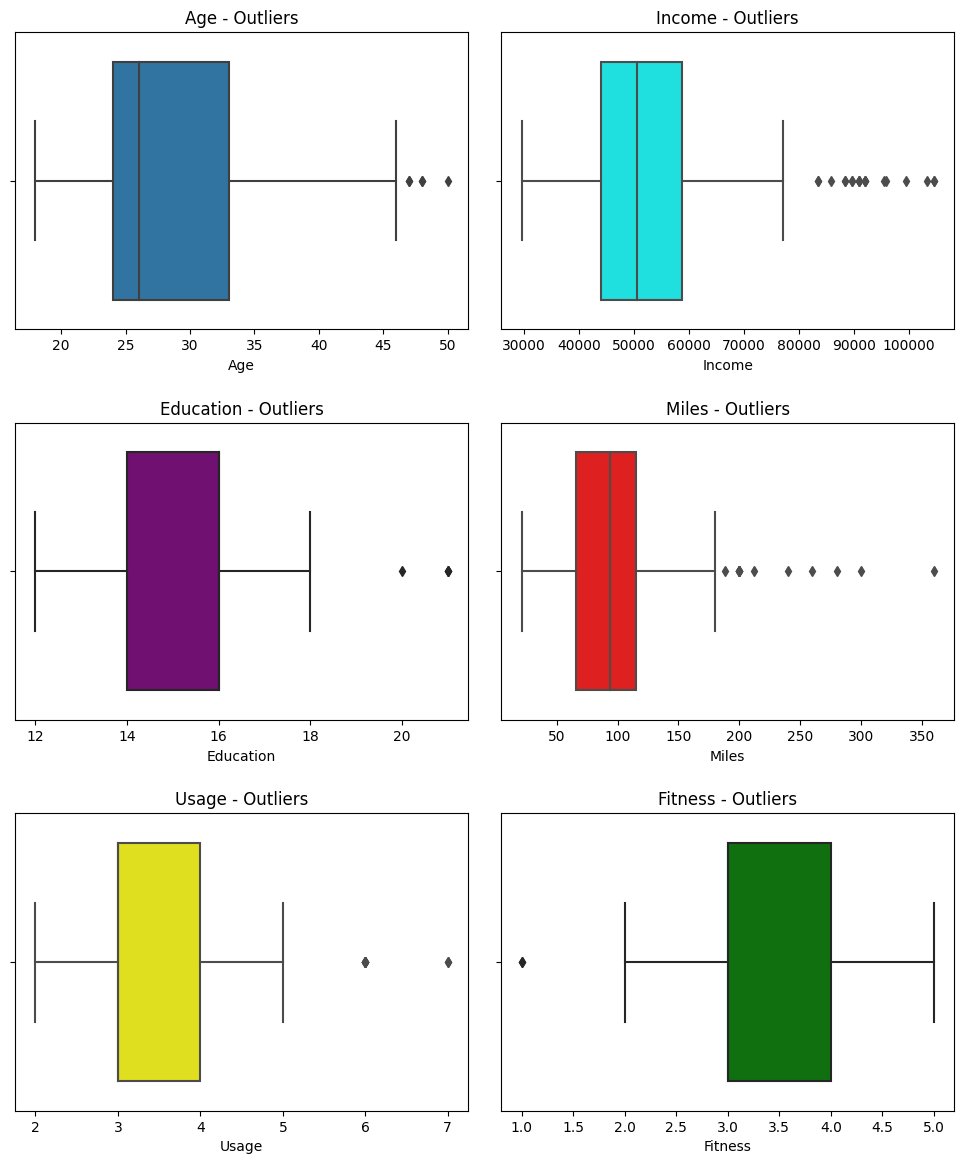

In [76]:
fig =  plt.figure(figsize=(10,12))

plt.subplot(3,2,1)
sns.boxplot(data=df, x="Age")
plt.title('Age - Outliers')

plt.subplot(3,2,2)
sns.boxplot(data=df, x="Income", color="cyan")
plt.title('Income - Outliers')

plt.subplot(3,2,3)
sns.boxplot(data=df, x="Education", color="purple")
plt.title('Education - Outliers')

plt.subplot(3,2,4)
sns.boxplot(data=df, x="Miles", color="red")
plt.title('Miles - Outliers')

plt.subplot(3,2,5)
sns.boxplot(data=df, x="Usage", color="yellow")
plt.title('Usage - Outliers')

plt.subplot(3,2,6)
sns.boxplot(data=df, x="Fitness", color='green')
plt.title('Fitness - Outliers')

fig.tight_layout(pad=2.0)
plt.show()

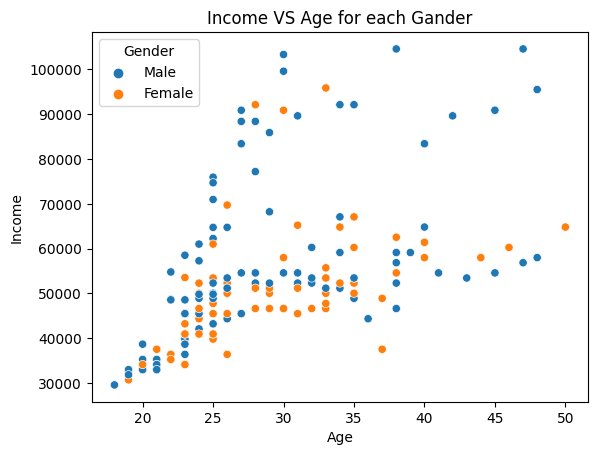

In [77]:
sns.scatterplot(data=df, x='Age',y='Income', hue='Gender')
plt.title('Income VS Age for each Gander')
plt.show()

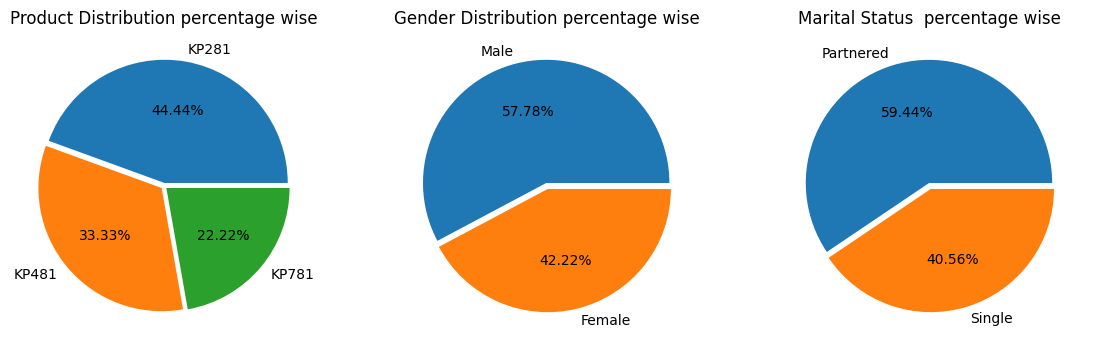

In [78]:
fig =  plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
plt.pie(x=df['Product'].value_counts(), labels=df['Product'].value_counts().index, explode=[0.025,0.025,0.025],
        autopct='%1.2f%%')
plt.title('Product Distribution percentage wise')

plt.subplot(1,3,2)
plt.pie(x=df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, explode=[0.025,0.025],
        autopct='%1.2f%%')
plt.title('Gender Distribution percentage wise')

plt.subplot(1,3,3)
plt.pie(x=df['MaritalStatus'].value_counts(), labels=df['MaritalStatus'].value_counts().index, explode=[0.025,0.025],
        autopct='%1.2f%%')
plt.title('Marital Status  percentage wise')

plt.show()

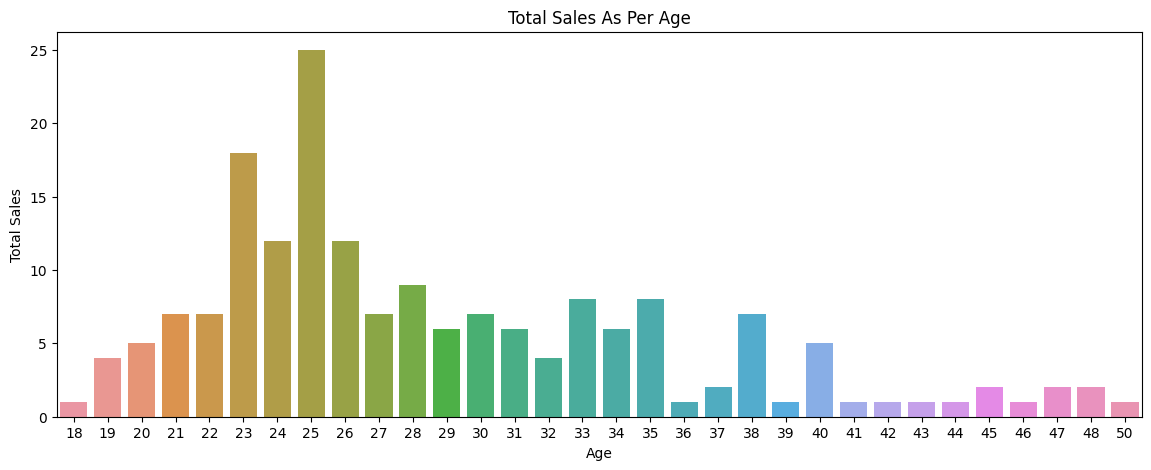

In [79]:
plt.figure(figsize=(14,5))
sns.countplot(data=df, x='Age')
plt.title('Total Sales As Per Age') 
plt.ylabel('Total Sales')
plt.xlabel("Age")
plt.show()

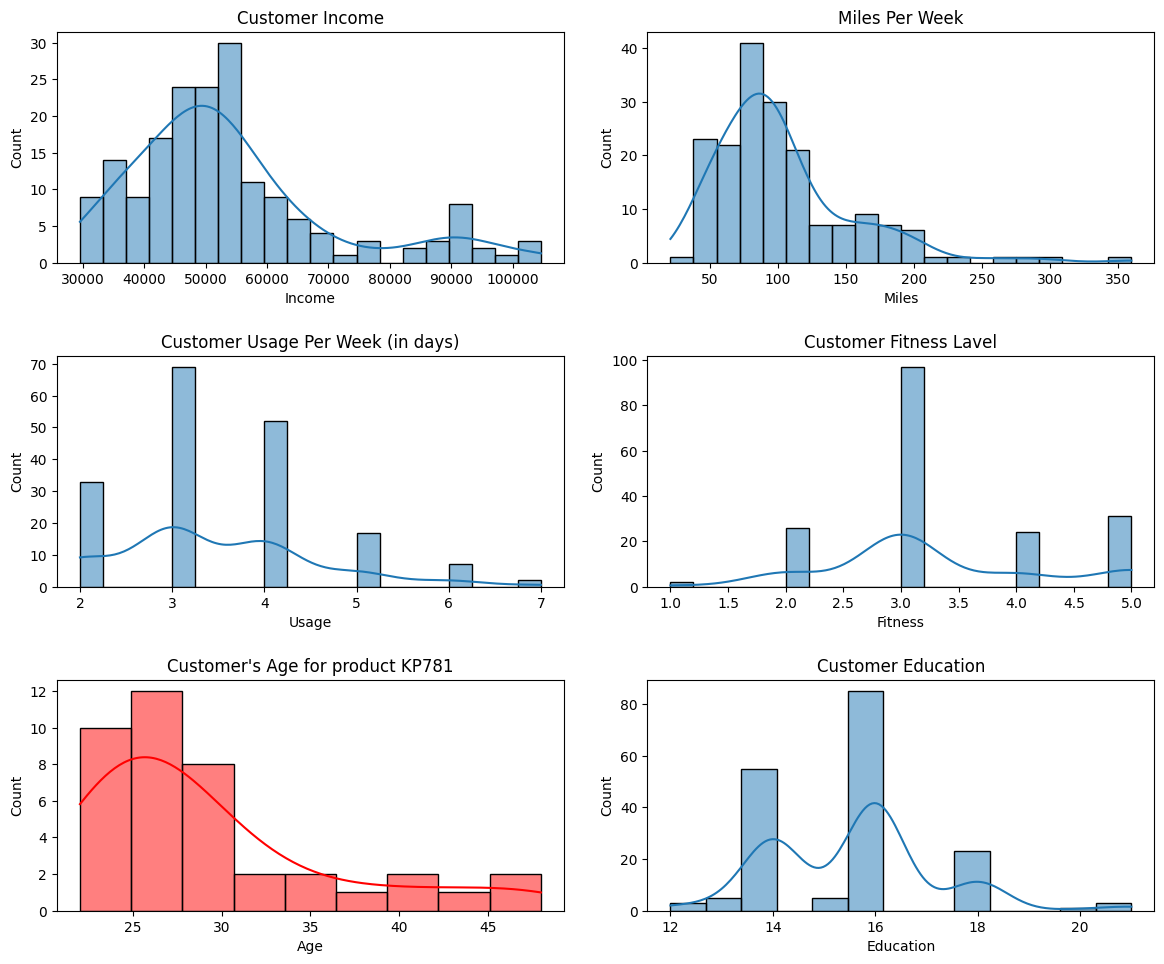

In [80]:
fig =  plt.figure(figsize=(12,10))

plt.subplot(3,2,1)
sns.histplot(data=df, x=df['Income'], kde=True, bins=20)
plt.title('Customer Income')

plt.subplot(3,2,2)
sns.histplot(data=df, x=df['Miles'], kde=True, bins=20)
plt.title('Miles Per Week')

plt.subplot(3,2,3)
sns.histplot(data=df, x=df['Usage'], kde=True, bins=20)
plt.title('Customer Usage Per Week (in days)')

plt.subplot(3,2,4)
sns.histplot(data=df, x=df['Fitness'], kde=True, bins=20)
plt.title('Customer Fitness Lavel')

plt.subplot(3,2,5)
sns.histplot(x=df[df['Product']=='KP781']['Age'], kde=True, color='r')
plt.title("Customer's Age for product KP781") 

plt.subplot(3,2,6)
sns.histplot(data=df, x=df['Education'], kde=True)
plt.title('Customer Education')



fig.tight_layout(pad=2.0)
plt.show()


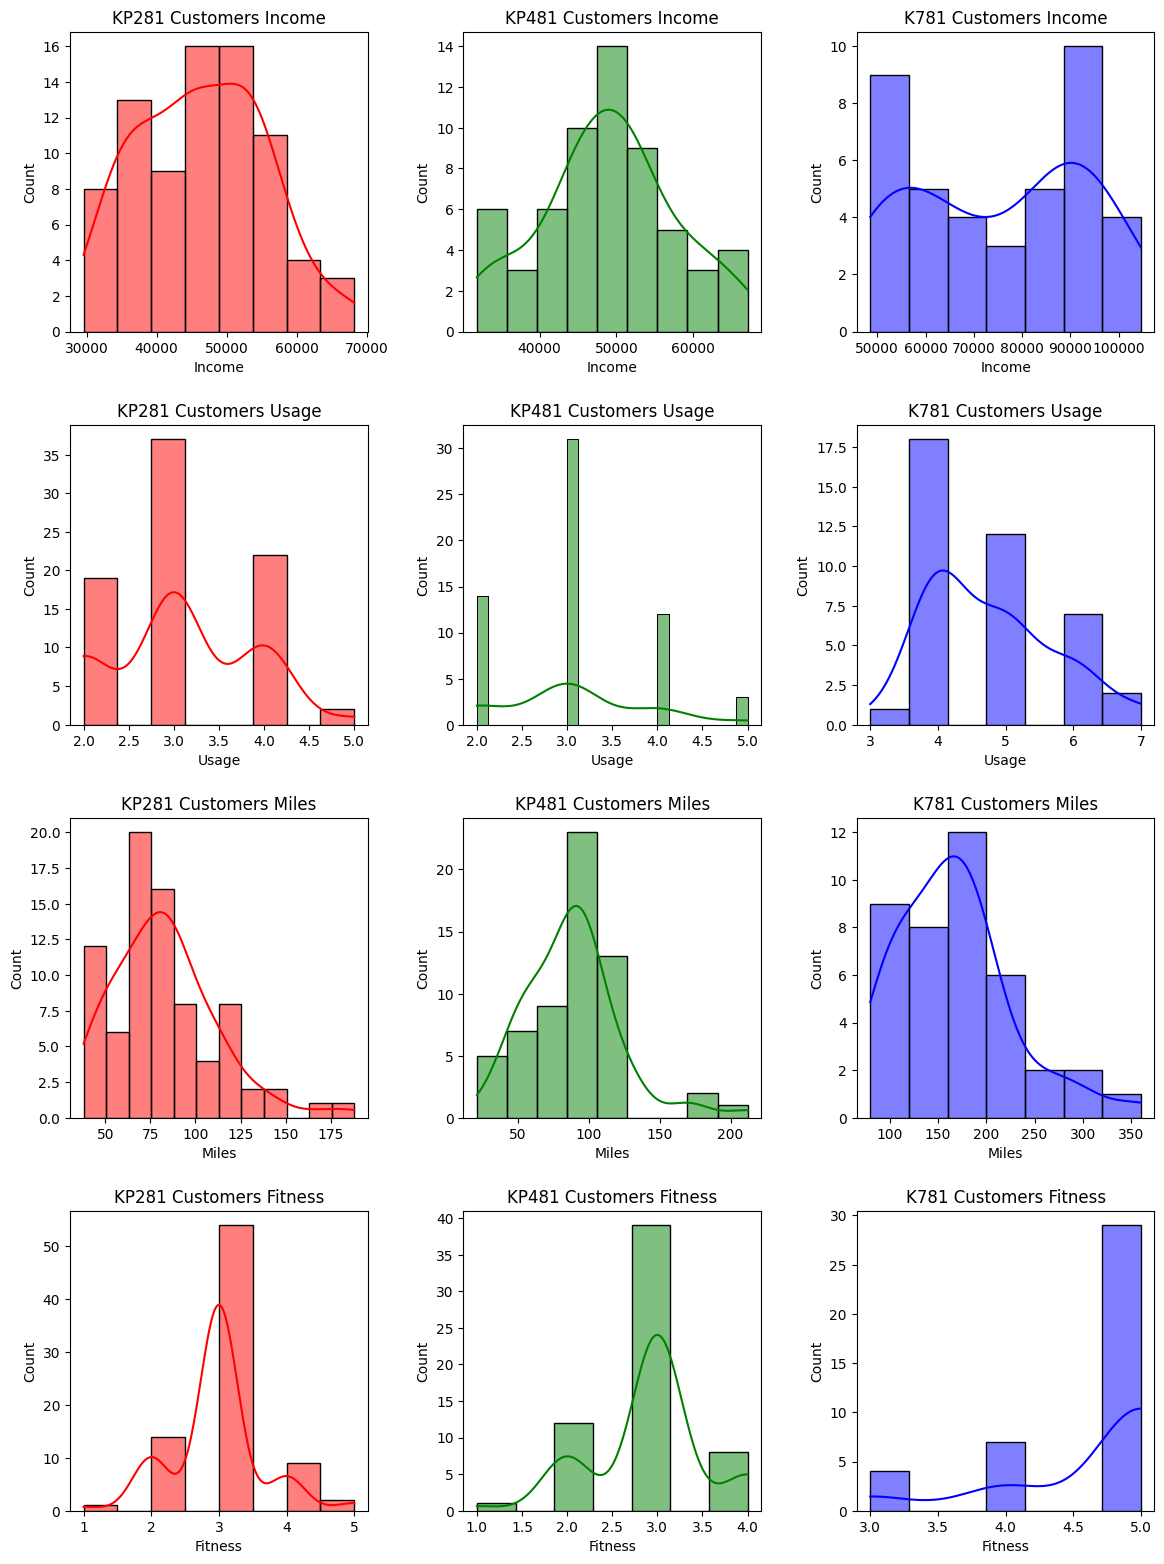

In [81]:
fig =  plt.figure(figsize=(12,16))

plt.subplot(4,3,1)
p1 = df[df['Product']=='KP281']
sns.histplot(x=p1['Income'], kde=True, color='r')
plt.title('KP281 Customers Income')

plt.subplot(4,3,2)
p2 = df[df['Product']=='KP481']
sns.histplot(x=p2['Income'], kde=True, color='g')
plt.title('KP481 Customers Income')

plt.subplot(4,3,3)
p3 = df[df['Product']=='KP781']
sns.histplot(x=p3['Income'], kde=True, color="b")
plt.title('K781 Customers Income')

plt.subplot(4,3,4)
p1 = df[df['Product']=='KP281']
sns.histplot(x=p1['Usage'], kde=True, color='r')
plt.title('KP281 Customers Usage')

plt.subplot(4,3,5)
p2 = df[df['Product']=='KP481']
sns.histplot(x=p2['Usage'], kde=True, color='g')
plt.title('KP481 Customers Usage')

plt.subplot(4,3,6)
p3 = df[df['Product']=='KP781']
sns.histplot(x=p3['Usage'], kde=True, color="b")
plt.title('K781 Customers Usage')

plt.subplot(4,3,7)
p1 = df[df['Product']=='KP281']
sns.histplot(x=p1['Miles'], kde=True, color='r')
plt.title('KP281 Customers Miles')

plt.subplot(4,3,8)
p2 = df[df['Product']=='KP481']
sns.histplot(x=p2['Miles'], kde=True, color='g')
plt.title('KP481 Customers Miles')

plt.subplot(4,3,9)
p3 = df[df['Product']=='KP781']
sns.histplot(x=p3['Miles'], kde=True, color="b")
plt.title('K781 Customers Miles')

plt.subplot(4,3,10)
p1 = df[df['Product']=='KP281']
sns.histplot(x=p1['Fitness'], kde=True, color='r')
plt.title('KP281 Customers Fitness')

plt.subplot(4,3,11)
p2 = df[df['Product']=='KP481']
sns.histplot(x=p2['Fitness'], kde=True, color='g')
plt.title('KP481 Customers Fitness')

plt.subplot(4,3,12)
p3 = df[df['Product']=='KP781']
sns.histplot(x=p3['Fitness'], kde=True, color="b")
plt.title('K781 Customers Fitness')

fig.tight_layout(pad=2.0)
plt.show()



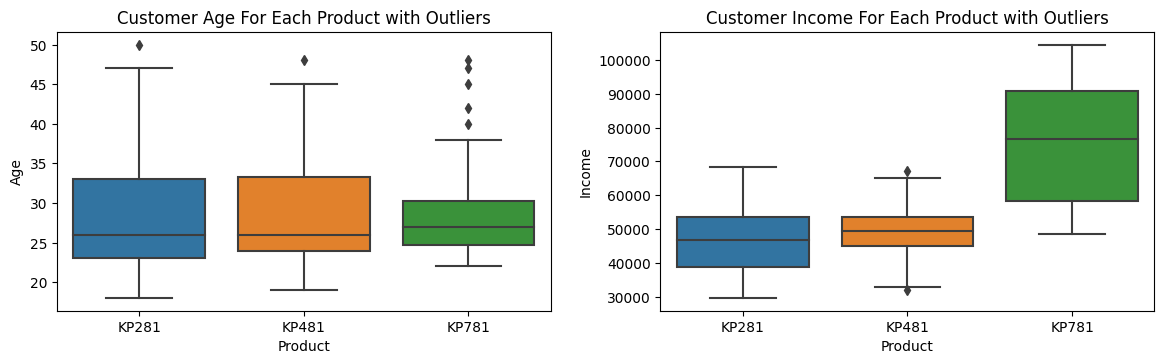

In [82]:
fig =  plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.boxplot(data=df, x="Product", y="Age")
plt.title('Customer Age For Each Product with Outliers')

plt.subplot(1,2,2)
sns.boxplot(data=df, x="Product", y="Income")
plt.title('Customer Income For Each Product with Outliers')

fig.tight_layout(pad=2.0)
plt.show()

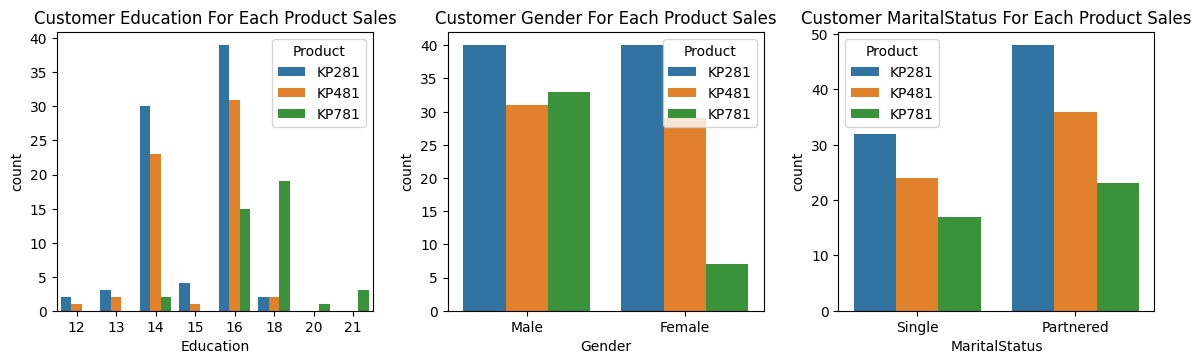

In [83]:
fig =  plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.countplot(data=df, x="Education", hue="Product")
plt.title('Customer Education For Each Product Sales')

plt.subplot(1,3,2)
sns.countplot(data=df, x="Gender", hue="Product")
plt.title('Customer Gender For Each Product Sales')


plt.subplot(1,3,3)
sns.countplot(data=df, x="MaritalStatus", hue="Product")
plt.title('Customer MaritalStatus For Each Product Sales')

fig.tight_layout(pad=2.0)
plt.show()

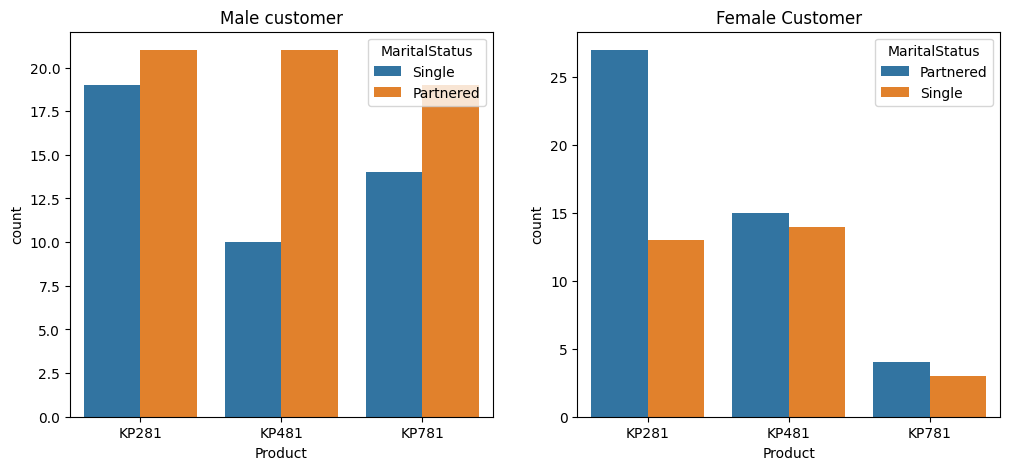

In [84]:
dff=df[df['Gender']=='Female']
dfm=df[df['Gender']=='Male']
fig =  plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(data=dfm, x='Product', hue='MaritalStatus')
plt.title('Male customer')

plt.subplot(1,2,2)
sns.countplot(data=dff, x='Product', hue='MaritalStatus')
plt.title('Female Customer')

plt.show()

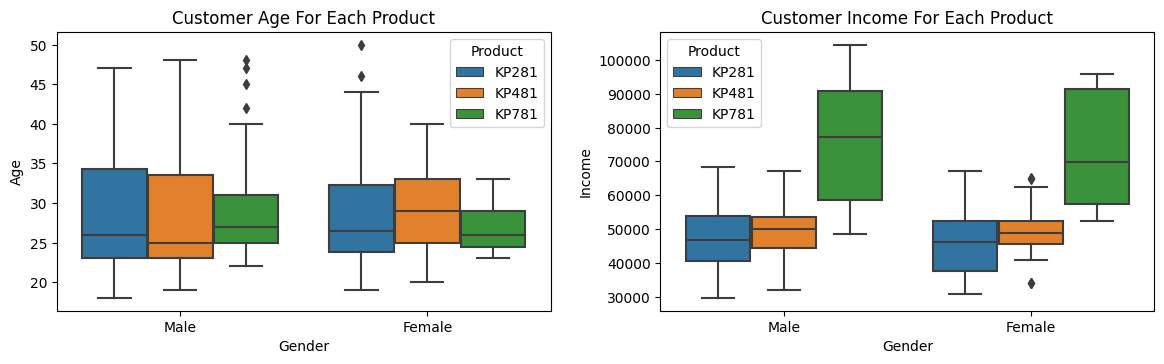

In [85]:
fig =  plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.boxplot(data=df, x="Gender", y="Age", hue="Product")
plt.title('Customer Age For Each Product')

plt.subplot(1,2,2)
sns.boxplot(data=df, x="Gender", y="Income", hue="Product")
plt.title('Customer Income For Each Product')

fig.tight_layout(pad=2.0)
plt.show()

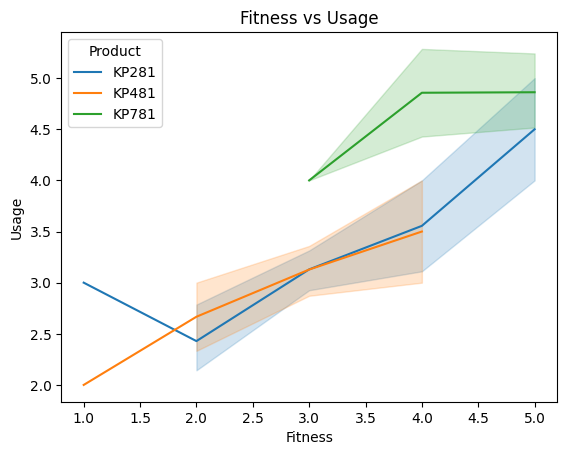

In [86]:
sns.lineplot(data=df, x='Fitness', y='Usage', hue='Product')
plt.title('Fitness vs Usage')
plt.show()

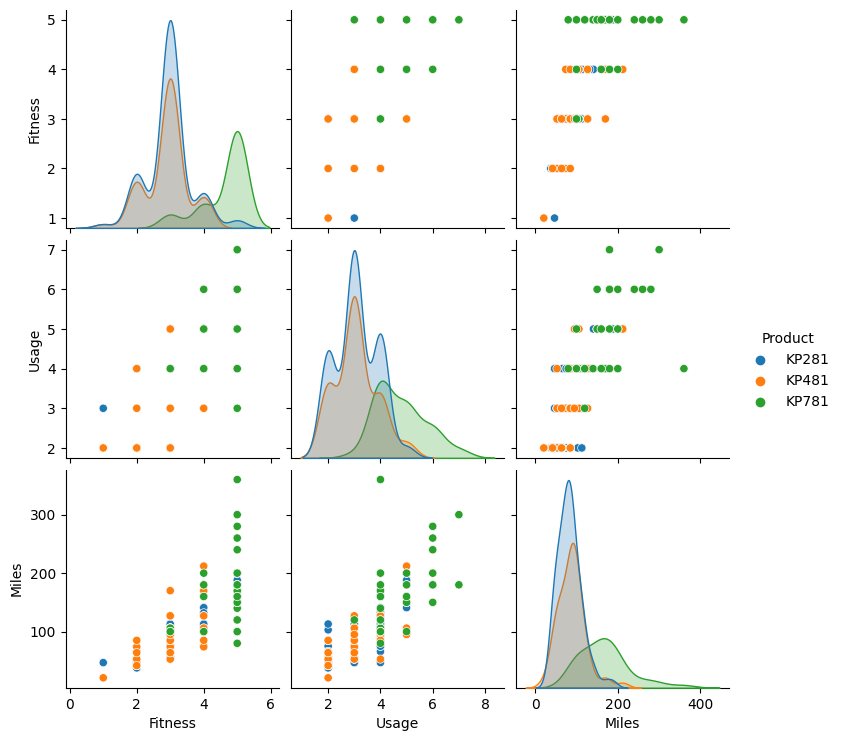

In [87]:
sns.pairplot(data=df[['Fitness','Usage','Miles','Product']], hue='Product')
plt.show()

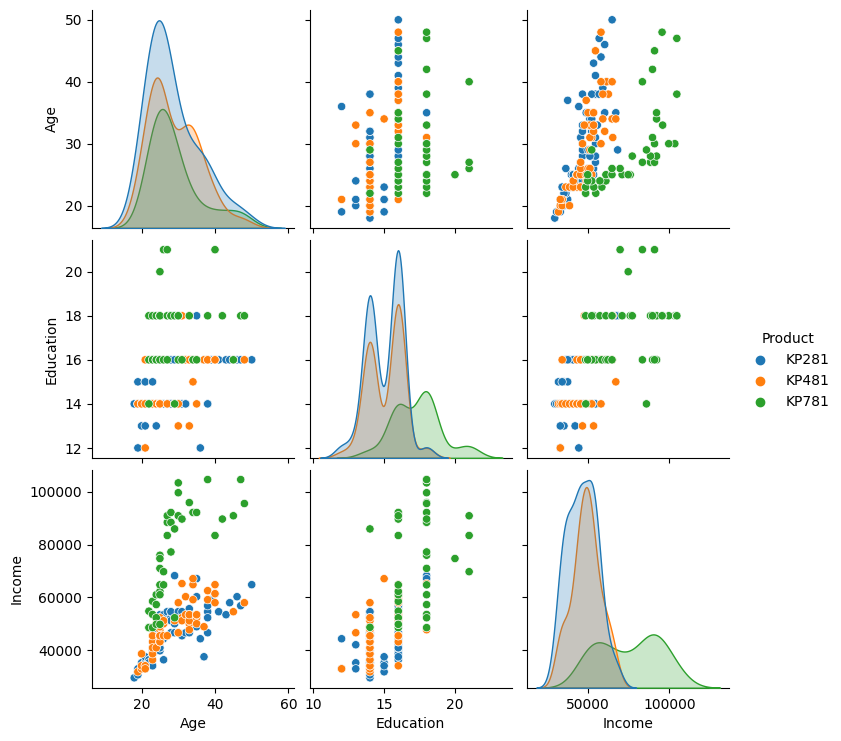

In [88]:
sns.pairplot(data=df[['Age','Education','Income','Product']], hue='Product')
plt.show();

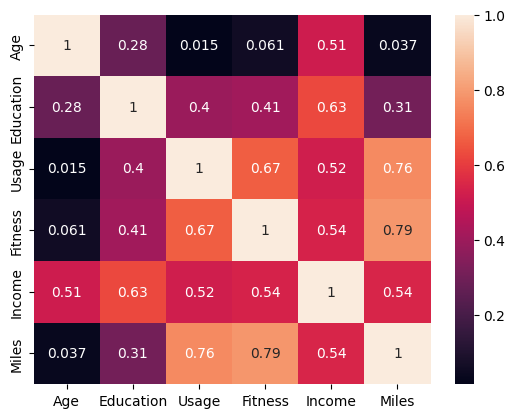

In [89]:
sns.heatmap(df[['Age','Education','Usage','Fitness','Income','Miles']].corr(), annot=True)
plt.show()

In [94]:
print('coefficient correlation\n')
round(df.corr()*100, 2)

coefficient correlation



,Age,Education,Usage,Fitness,Income,Miles
Age,100.00,28.05,1.51,6.11,51.34,3.66
Education,28.05,100.00,39.52,41.06,62.58,30.73
Usage,1.51,39.52,100.00,66.86,51.95,75.91
Fitness,6.11,41.06,66.86,100.00,53.50,78.57
Income,51.34,62.58,51.95,53.50,100.00,54.35
Miles,3.66,30.73,75.91,78.57,54.35,100.00


**<h4> Business Insights based on Non-Graphical and Visual Analysis </h4>**



*  Height sold product is KP281. its 44.44% of all treadmill sales.
*  Male Customer's  is 57.78%.  
*  For KP281 and KP481 both male and female customer have similar buying %.
*  KP781 is more preferred by male customers. 
*  As number of day increase in usage KP281, KP481 sales get down by 10 to 12%.
*  Customers that Usage as 7 days/week only buy KP781. 
*  Most fit Customers also prefer KP781.
*  Unfit Customers are less likly to any treadmill then avarage fit customers.
*  59.44% of all customers are partnered. 
*  Fit Customers have high usage. 
*  Probability of buying KP281 increased from 44.44% to 58.7%, if customer is Female and Partnered.
*  Probability of buying KP781 increased from 22.22% to 32.56%, if customer is Male and Single.
*  Probability of buying KP781 decreased from 22.22% to 8.70%, if customer is Female and Partnered.
*  Highly Qualified Customer (i.e more then 16) prefer to buy prodouct KP781
*  75% of customers are earning less than 60k, and customers who earning more than 60k prefer KP781.
*  If Customer usage is more than 150 miles, mostly preferred KP781.
*  Young Customers (i.e age between 25 and 30) prefer KP781.
*  Fitness level greater than 3 and usage more than 4days per week, are prefers KP781.
*  Customers of both gender with high annual income prefer to buy KP781. 











**<h4> KP281 Customer's </h4>**
*  Most popular product.
*  Usage less then 4 days/week.
*  Fitness level mostly under 3
*  Below medium or medium annual Imcome.
*  Education is less then or equal to 16 year.
*  Female who partnered more chance then single

**<h4> KP481 Customer's </h4>**
*  Second most popular product.
*  Partnered more chance then single.
*  Other Similar to KP281.

**<h4> KP781 Customer's </h4>**
*  Usage more then 4 days/week.
*  More then 120 miles per week.
*  Fitness level is more then 3. 
*  Education is more then 16 year.
*  High annual Income.
*  Moslty male.








**<h4> Recommendation </h4>**

*  KP281 and KP481 both are preferred by similar customers yet KP481 sales is less then KP281. We can promote product KP481 for better reach.
*  KP781 is a premium prouct only preferred by people with good fitness, good income and high education. Also more preferred by male.
We can promote product of categories other then treadmill with same characteristics and premium.
*  KP781 can be more promated between female customers.
*  We can do target promotion for each product to people with similar above characteristics. 







In [96]:
%%shell
jupyter nbconvert --to html /content/sample_data/aerofit.ipynb

[NbConvertApp] Converting notebook /content/sample_data/aerofit.ipynb to html
[NbConvertApp] Writing 1926636 bytes to /content/sample_data/aerofit.html
